In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn

class Relu():

    def __init__(self, n_coefficients=9, domain=(-100, 100)):
        self.cache = None
        self.coeff = self.compute_coefficients_relu(n_coefficients, domain)
        print(list(range(len(self.coeff))[::-1]))
        print(self.coeff)
        self.coeff_dir = np.multiply(self.coeff, range(len(self.coeff))[::-1])[:-1]
        print(self.coeff_dir)

    def initialize(self):
        pass

    def forward(self, x):
        x_powers = np.array([x ** i for i in range(len(self.coeff))][::-1]).T
        y = x_powers.dot(self.coeff)
        self.cache = x_powers[:,1:]
        print(np.shape(self.cache))
        return y

    def backward(self, d_y, learning_rate):
        x_powers = self.cache
        d_x = d_y * x_powers.dot(self.coeff_dir)
        return d_x
    
    def relu_dir(self, x):
        x_powers = np.array([x ** i for i in range(len(self.coeff)-1)][::-1]).T
        y = x_powers.dot(self.coeff_dir)
        return y
    
    @staticmethod
    def compute_coefficients_relu(n_coefficients, domain):
        assert domain[0] < 0 < domain[1]
        x = list(range(domain[0], domain[1]))
        y = [0] * abs(domain[0]) + list(range(0, domain[1]))
        return np.polyfit(x, y, n_coefficients)

              
relu_layer = Relu(n_coefficients=9, domain=(-10, 10))
print('\n')
x = np.arange(-10,11)
y = relu_layer.forward(x)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[-1.92804832e-08 -2.94860924e-07  3.31827264e-06  5.84958639e-05
 -1.85771873e-04 -4.17839433e-03  3.73540917e-03  1.63463277e-01
  4.80526232e-01  2.86574979e-01]
[-1.73524349e-07 -2.35888739e-06  2.32279085e-05  3.50975183e-04
 -9.28859365e-04 -1.67135773e-02  1.12062275e-02  3.26926554e-01
  4.80526232e-01]


(21, 9)


In [163]:
x = np.arange(-10,11)
y = relu_layer.relu_dir(x)
print(np.shape(y))
y_str = ['{0:.10f}'.format(a) for a in y]
for v in y:
    print(v)

(21,)
0.12369627633962593
-0.03179640964813196
-0.04095204744179365
0.019923346720177648
0.052143563826716754
0.017352962297170704
-0.05298054889209486
-0.08770183523403302
-0.019142202695887844
0.18026506072237902
0.48052623155226587
0.8013882474704459
1.0430053141398252
1.1315804807066236
1.0645951406330367
0.9332429127959001
0.8926878560326712
1.043770468566892
1.1827884219961955
0.3689824777767801
-3.7476384676108583


In [59]:
def poly_approx(x, coefficients): 
    return sum([coefficient * x ** (len(coefficients) - 1 - i) for i, coefficient in enumerate(coefficients)])

    
def compute_coefficients_ReLU(n_coefficients, domain=(-100, 100)):
    assert domain[0] < 0 < domain[1]
    x = list(range(domain[0], domain[1]))
    y = [0] * abs(domain[0]) + list(range(0, domain[1]))
    return np.polyfit(x, y, n_coefficients), x, y


def plot_ReLU(coefficients, x, y):
    ReLU = np.poly1d(coefficients)
    x_new = np.linspace(x[0], x[-1], 50)
    y_new = ReLU(x_new)

    pylab.rcParams['figure.figsize'] = (15, 10)
    plt.plot(x,y, x_new, y_new)
    pylab.title('Coefficients: {}'.format(len(coefficients)-1))
    ax = plt.gca()
    fig = plt.gcf()
    
coefficients, x, y = compute_coefficients_ReLU(9, (-300, 300))
print(coefficients)
print(poly_approx(10, coefficients))

[-6.26908926e-22 -7.63713651e-18  1.06893581e-16  1.58466380e-12
 -5.94142031e-12 -1.18830167e-07  1.18816303e-07  4.93518136e-03
  4.99383132e-01  1.00921468e+01]
15.578427719504845


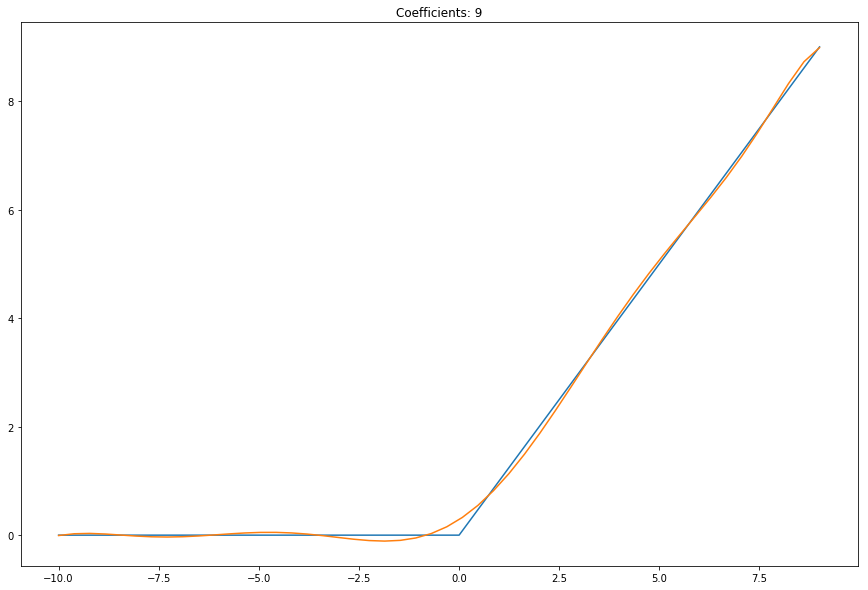

In [54]:
coefficients, x, y = compute_coefficients_ReLU(9, (-10, 10))   
plot_ReLU(coefficients, x, y)

In [ ]:
coefficients, x, y = compute_coefficients_ReLU(9, (-100, 100))   
plot_ReLU(coefficients, x, y)

In [ ]:
coefficients, x, y = compute_coefficients_ReLU(9, (-1000, 1000))   
plot_ReLU(coefficients, x, y)

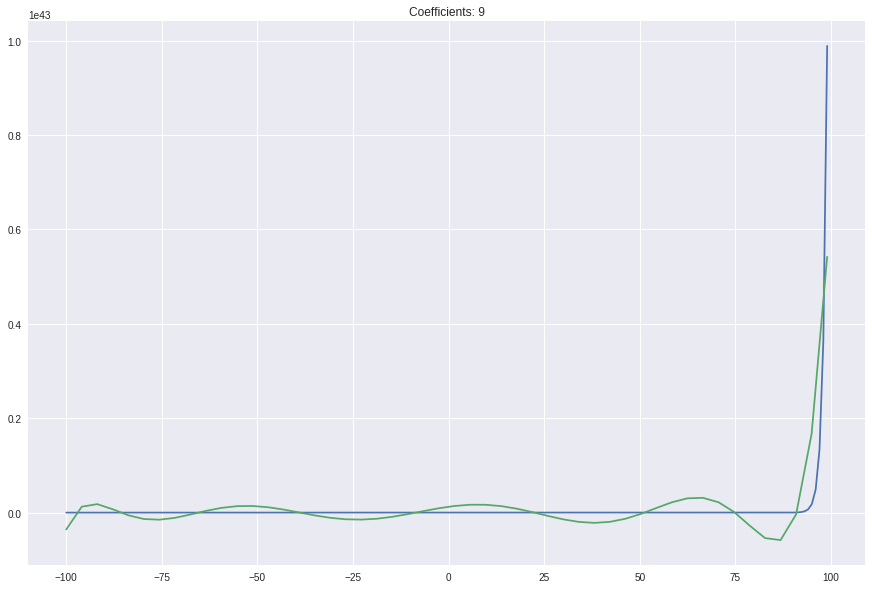

In [74]:
def compute_coefficients_softmax(n_coefficients, domain=(-100, 100)):
    assert domain[0] < 0 and domain[1] > 0
    x = range(domain[0], domain[1])
    y = np.power(np.e, x)
    return np.polyfit(x, y, n_coefficients), x, y


def plot_softmax(coefficients, x, y):
    ReLU = np.poly1d(coefficients)
    x_new = np.linspace(x[0], x[-1], 50)
    y_new = ReLU(x_new)

    pylab.rcParams['figure.figsize'] = (15, 10)
    plt.plot(x,y, x_new, y_new)
    pylab.title('Coefficients: {}'.format(len(coefficients)-1))
    ax = plt.gca()
    fig = plt.gcf()

coefficients, x, y = compute_coefficients_softmax(9, (-100, 100))   
plot_softmax(coefficients, x, y)